# MOVIE ANALYTICS (Learning how to analyze data and conduct analysis effectively)
- By Fayshal Karan Athilla | 442023611088 | Informatic Engineering
- Module by: Myskill.com

## IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## CHECK DATASET

### DATASET MOVIE

In [2]:
movies_data = pd.read_csv("/content/movies_metadata.csv")

In [3]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [4]:
movies_data.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
17559,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 99, 'nam...",http://www.paulyshoreadopted.com/,38937,tt1264103,en,Adopted,"For hundreds of years, Africa has existed in a...",...,2009-01-01,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Adopted,False,4.6,4.0
7134,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,92298,tt0075161,en,The Sailor Who Fell from Grace with the Sea,When a widowed mother falls in love with an Am...,...,1976-04-11,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Sailor Who Fell from Grace with the Sea,False,6.4,7.0
3261,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,43463,tt0039748,en,Railroaded!,A mobster frames an innocent man for the killi...,...,1947-09-25,0.0,72.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Railroaded!,False,6.6,9.0
31635,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,53851,tt0029899,en,The Baroness and the Butler,A Butler (Powell) gets elected to the Hungaria...,...,1938-02-18,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Baroness and the Butler,False,6.5,1.0
33942,True,NaN,0,"[{'id': 10752, 'name': 'War'}, {'id': 28, 'nam...",NaN,72664,tt0087742,fr,Les Morfalous,"April 5, 1943: a battalion of the Foreign Legi...",...,1984-03-28,0.0,95.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,The Vultures,False,6.2,13.0
5707,True,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 80, '...",NaN,45226,tt0082958,en,The Pursuit of D.B. Cooper,A speculation on the fate of the famous hijack...,...,1981-11-13,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who says you can't take it with you?,The Pursuit of D.B. Cooper,False,6.8,4.0
15906,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,85290,tt0065820,en,The Hawaiians,A wanderer returns home only to find political...,...,1970-06-17,0.0,134.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The continuation of James A. Michener's epic n...,The Hawaiians,False,5.9,4.0
1402,True,NaN,50000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,66,tt0118548,en,Absolute Power,A master thief coincidentally is robbing a hou...,...,1997-02-14,50068310.0,121.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Corrupts Absolutely.,Absolute Power,False,6.4,226.0
36345,True,NaN,0,[],NaN,124480,tt1274636,en,Aita,An old empty house. The guard who takes care o...,...,2010-11-12,0.0,85.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,NaN,Father,False,8.5,2.0
36306,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 12, 'name...",NaN,184260,tt0259602,ka,Suramis tsikhe,The legend of the Suram Fortress.,...,1922-10-09,0.0,70.0,"[{'iso_639_1': 'ka', 'name': 'ქართული'}]",Released,NaN,The Suram Fortress,False,0.0,0.0


In [5]:
# melihat pada kolom release_date dtype nya object, maka kita ubah menjadi datetime()

movies_data["release_date"] = pd.to_datetime(movies_data["release_date"])

In [6]:
# cek dtype nya sudah berubah
movies_data["release_date"].dtypes

dtype('<M8[ns]')

In [7]:
movies_data["status"].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [8]:
movies_data["original_language"].nunique()

89

In [10]:
movies_data["status"] == "Released"

,status
0,True
1,True
2,True
3,True
4,True
...,...
45458,True
45459,True
45460,True
45461,True


In [9]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45463 non-null  bool          
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 45463 non-null  int64         
 3   genres                 45463 non-null  object        
 4   homepage               7779 non-null   object        
 5   id                     45463 non-null  int64         
 6   imdb_id                45446 non-null  object        
 7   original_language      45452 non-null  object        
 8   original_title         45463 non-null  object        
 9   overview               44509 non-null  object        
 10  popularity             45460 non-null  float64       
 11  poster_path            45077 non-null  object        
 12  production_companies   45460 non-null  object        
 13  p

In [11]:
movies_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [12]:
movies_data["profit"] = movies_data["revenue"] - movies_data["budget"]

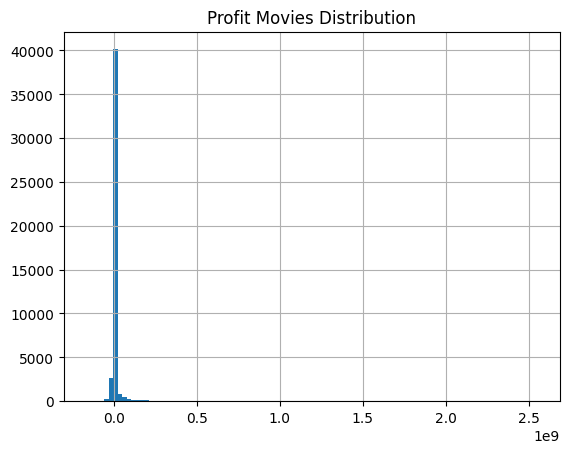

In [13]:
movies_data["profit"].hist(bins = 100)
plt.title("Profit Movies Distribution")
plt.show()

In [14]:
movies_data["profit"].describe()

,profit
count,4.546000e+04
mean,6.984491e+06
std,5.214125e+07
min,-1.657101e+08
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.550965e+09


<Axes: >

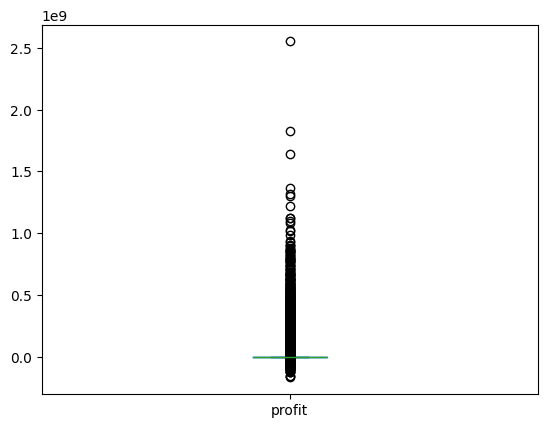

In [15]:
movies_data["profit"].plot(kind = "box")

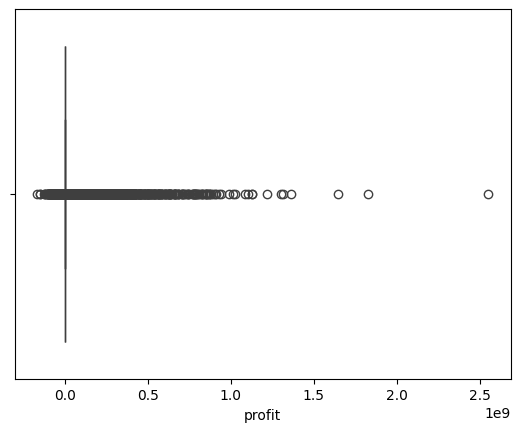

In [16]:
sns.boxplot(data = movies_data, x = "profit")
plt.show()

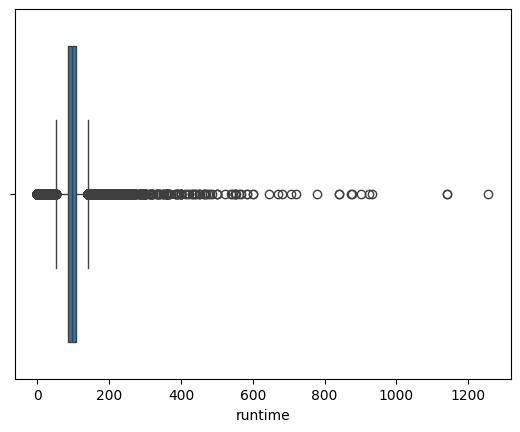

In [18]:
sns.boxplot(data = movies_data, x = "runtime")
plt.show()

In [19]:
movies_data["profit"].quantile(0.9)

np.float64(1578210.8999999824)

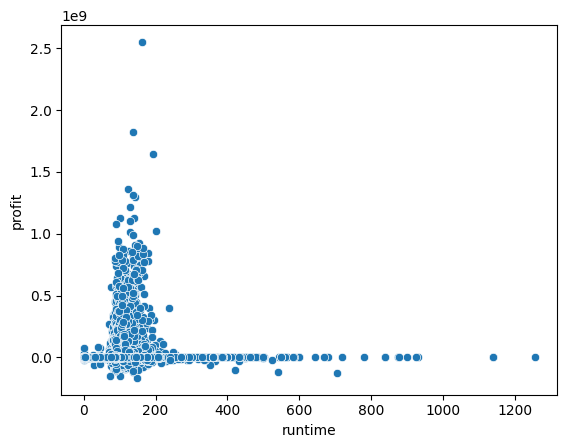

In [20]:
sns.scatterplot(data = movies_data,
                x = "runtime",
                y = "profit")
plt.show()

In [22]:
profitable_movies = movies_data[movies_data["profit"] > 0]

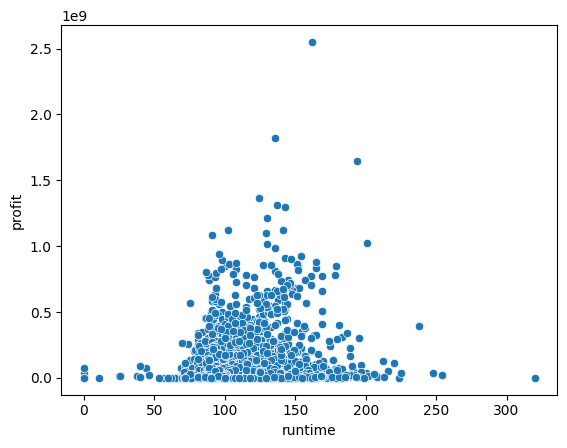

In [23]:
sns.scatterplot(data = profitable_movies,
                x = "runtime",
                y = "profit")
plt.show()

### DATASET RATING

In [24]:
rating = pd.read_csv("/content/ratings_small.csv")

In [27]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [28]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [25]:
rating_movies = rating.groupby("movieId", as_index = False)["rating"].median()

<Axes: xlabel='rating', ylabel='Count'>

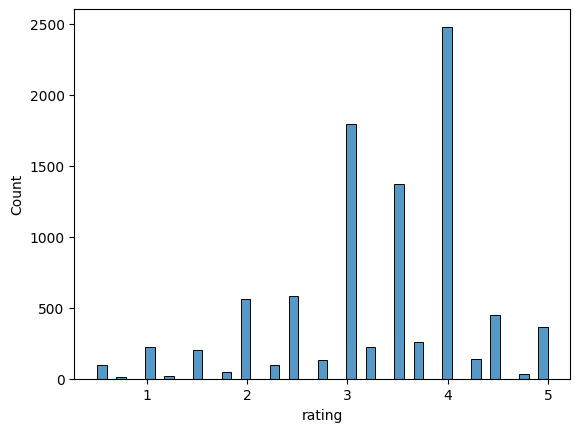

In [26]:
sns.histplot(data = rating_movies,
             x = "rating")

In [29]:
rating_movies["good_movies"] = rating_movies["rating"] >= 3

<Axes: ylabel='count'>

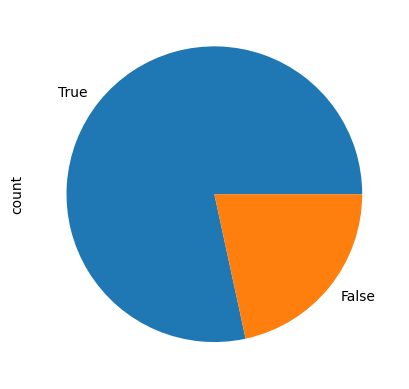

In [30]:
rating_movies["good_movies"].value_counts().plot(kind = "pie")

## EXPLANITORY

In [31]:
new_df = movies_data.merge(rating_movies,
                           left_on = "id",
                           right_on = "movieId",
                           how = "inner")

<Axes: xlabel='profit', ylabel='Count'>

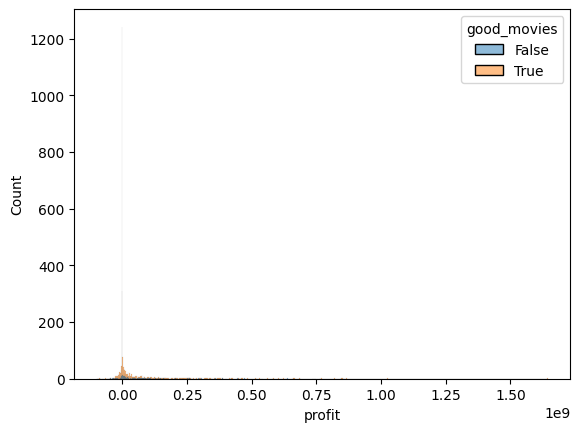

In [32]:
sns.histplot(data = new_df,
             x = "profit",
             hue = "good_movies")

<Axes: xlabel='rating', ylabel='profit'>

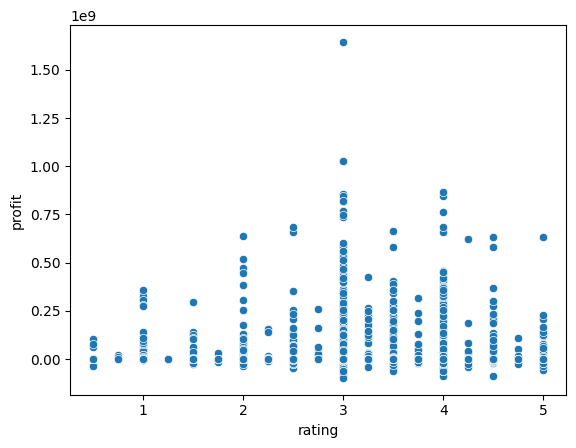

In [33]:
sns.scatterplot(data = new_df,
                x = "rating",
                y = "profit")

In [34]:
new_df[["rating"]]

,rating
0,3.75
1,1.50
2,4.00
3,3.50
4,5.00
...,...
2826,3.25
2827,4.00
2828,4.00
2829,4.00


<Axes: xlabel='original_language'>

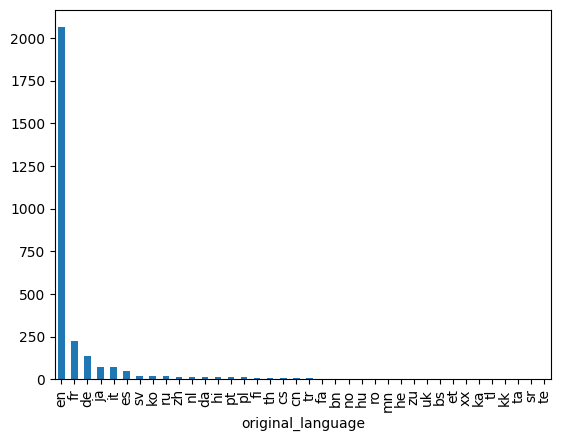

In [35]:
new_df["original_language"].value_counts().plot(kind = "bar")

In [36]:
new_df.select_dtypes(include = "number")

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit,movieId,rating
0,60000000,949,17.924927,187436818.0,170.0,7.7,1886.0,127436818.0,949,3.75
1,58000000,710,14.686036,352194034.0,130.0,6.6,1194.0,294194034.0,710,1.50
2,98000000,1408,7.284477,10017322.0,119.0,5.7,137.0,-87982678.0,1408,4.00
3,52000000,524,10.137389,116112375.0,178.0,7.8,1343.0,64112375.0,524,3.50
4,16500000,4584,10.673167,135000000.0,136.0,7.2,364.0,118500000.0,4584,5.00
...,...,...,...,...,...,...,...,...,...,...
2826,0,80831,0.083371,0.0,121.0,6.5,2.0,0.0,80831,3.25
2827,0,3104,2.302582,0.0,92.0,5.9,33.0,0.0,3104,4.00
2828,0,64197,0.528657,0.0,97.0,6.0,5.0,0.0,64197,4.00
2829,0,98604,0.803588,0.0,91.0,4.6,6.0,0.0,98604,4.00


In [37]:
def select_columns(df: pd.DataFrame, features: list, target: list = "rating"):
  df = df.dropna().reset_index(drop = True)
  X = df[features]
  y = (df[target] >= 3).astype("int")

  return X, y

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
features = ["budget", "popularity", "vote_average"]
X, y = select_columns(new_df, features = features)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
minmax = MinMaxScaler()

In [43]:
minmax.fit(X_train)

MinMaxScaler()

In [49]:
def scaling(df, scaler):

  scaled_array = scaler.transform(df)
  scaled_df = pd.DataFrame(scaled_array, columns = scaler.get_feature_names_out())

  return scaled_df

In [50]:
X_train_scaled = scaling(X_train, minmax)
X_test_scaled = scaling(X_test, minmax)

In [51]:
X_test_scaled.iloc[0]

,0
budget,0.500000
popularity,0.042270
vote_average,0.568182


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors = 5)
dt = DecisionTreeClassifier()

In [54]:
knn.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [55]:
y_train_pred_knn = knn.predict(X_train_scaled)
y_train_pred_dt = dt.predict(X_train_scaled)

In [56]:
y_test_pred_knn = knn.predict(X_test_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

In [57]:
pd.crosstab(y_test, y_test_pred_knn)

col_0,0,1
rating,,
0,0,6
1,1,35


In [58]:
pd.crosstab(y_test, y_test_pred_dt)

col_0,0,1
rating,,
0,0,6
1,4,32
